# Three Wave Mixing vs four wave mixing

## Packages

We load the following packages into our environment:

In [1]:
using HarmonicBalance, Plots
using Plots.Measures
using Random

Random.seed!(1234);
Threads.nthreads() # check number of threads

10

## system

In [2]:
@variables β α ω ω0 F γ t x(t) # declare constant variables and a function x(t)
diff_eq = DifferentialEquation(
    d(x, t, 2) + ω0^2 * x + β * x^2 + α * x^3 + γ * d(x, t) ~ F * cos(ω * t), x
)

add_harmonic!(diff_eq, x, ω) # specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)
add_harmonic!(diff_eq, x, 2ω)
add_harmonic!(diff_eq, x, 3ω)
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 6 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T), u3(T), v3(T)
Parameters: ω, α, γ, ω0, β, F

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt) + u2(T)*cos(2ωt) + v2(T)*sin(2ωt) + u3(T)*cos(3ωt) + v3(T)*sin(3ωt)

Harmonic equations:

(2//1)*Differential(T)(v1(T))*ω + Differential(T)(u1(T))*γ + u1(T)*u2(T)*β - u1(T)*(ω^2) + u1(T)*(ω0^2) + v3(T)*v2(T)*β + v2(T)*v1(T)*β + v1(T)*γ*ω + u3(T)*u2(T)*β + (3//4)*(u1(T)^3)*α + (3//4)*(u1(T)^2)*u3(T)*α + (3//2)*u1(T)*(v3(T)^2)*α + (3//2)*u1(T)*v3(T)*v1(T)*α + (3//2)*u1(T)*(v2(T)^2)*α + (3//4)*u1(T)*(v1(T)^2)*α + (3//2)*u1(T)*(u3(T)^2)*α + (3//2)*u1(T)*(u2(T)^2)*α + (3//2)*v3(T)*v2(T)*u2(T)*α - (3//4)*(v2(T)^2)*u3(T)*α - (3//4)*(v1(T)^2)*u3(T)*α + (3//4)*u3(T)*(u2(T)^2)*α ~ F

Differential(T)(v1(T))*γ - (2//1)*Differential(T)(u1(T))*ω + u1(T)*v2(T)*β - u1(T)*γ*ω + v3(T)*u2(T)*β - v2(T)*u3(T)*β - v1(T)*u2(T)*β - v1(T)*(ω^2) + v1(T)*(ω0^2) + (3//4)*(u1(T)^2)*v3(T)*α + (3//4)*(u1(T)^2)*v1(T)*α - (3//2)*u1(T)*v1(T)*u3(T)*α + (3

## four wave mixing

If we only have a cubic nonlineariy $\alpha$, we observe the normal duffing oscillator
response with no response at $2\omega$.

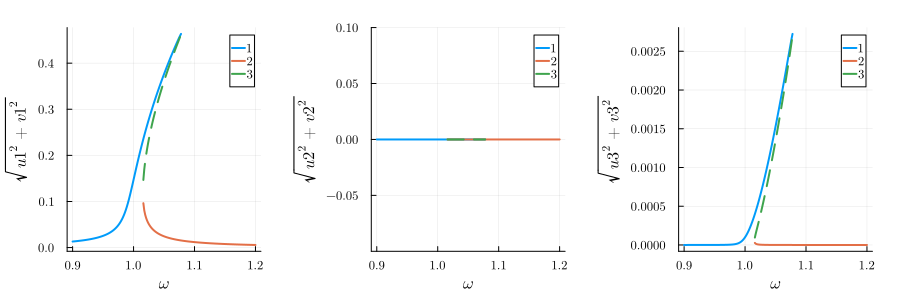

In [3]:
varied = (ω => range(0.9, 1.2, 200)) # range of parameter values
fixed = (α => 1.0, β => 0.0, ω0 => 1.0, γ => 0.005, F => 0.0025) # fixed parameters
result = get_steady_states(harmonic_eq, varied, fixed; threading=true)# compute steady states

p1 = plot(result; y="√(u1^2+v1^2)", legend=:best)
p2 = plot(result; y="√(u2^2+v2^2)", legend=:best, ylims=(-0.1, 0.1))
p3 = plot(result; y="√(u3^2+v3^2)", legend=:best)
plot(p1, p2, p3; layout=(1, 3), size=(900, 300), margin=5mm)

## Three wave mixing

If we only have a cubic nonlineariy $\alpha$, we observe the normal duffing oscillator
response with no response at $2\omega$.

We would like to investigate the three-wave mixing of the driven Duffing oscillator. This means we can excite the system resonantly if the oscillation frequencies $\omega_1$ and $\omega_2$ fullfil the conditions $\omega_1\pm\omega_2=\pm\omega_0$. Here, we will especially focus on the degenerate three wave mixing, where $\omega_2=\omega_0$ such that $2\omega_0=\omega_1$. This is a very important process in quantum optics, since it allows us to generate photons with a frequency in the visible range from photons with a frequency in the infrared range. This is called frequency doubling and is used in many applications, e.g. in laser pointers.

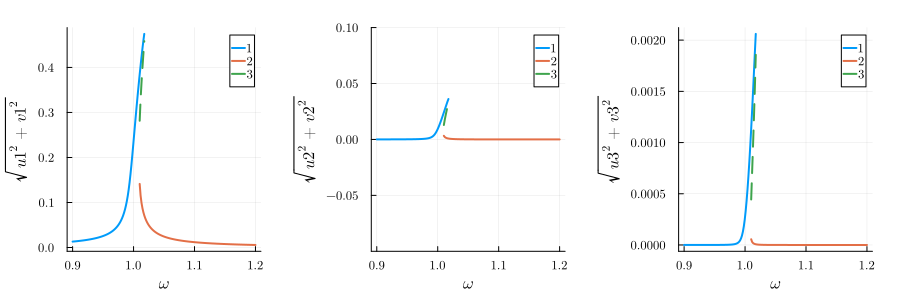

In [4]:
varied = (ω => range(0.9, 1.2, 200))
fixed = (α => 0.0, β => 1.0, ω0 => 1.0, γ => 0.005, F => 0.0025)
result = get_steady_states(harmonic_eq, varied, fixed; threading=true)

p1 = plot(result; y="√(u1^2+v1^2)", legend=:best)
p2 = plot(result; y="√(u2^2+v2^2)", legend=:best, ylims=(-0.1, 0.1))
p3 = plot(result; y="√(u3^2+v3^2)", legend=:best)
plot(p1, p2, p3; layout=(1, 3), size=(900, 300), margin=5mm)

## Both

If we only have a cubic nonlineariy $\alpha$, we observe the normal duffing oscillator
response with no response at $2\omega$.

We would like to investigate the three-wave mixing of the driven Duffing oscillator. This means we can excite the system resonantly if the oscillation frequencies $\omega_1$ and $\omega_2$ fullfil the conditions $\omega_1\pm\omega_2=\pm\omega_0$. Here, we will especially focus on the degenerate three wave mixing, where $\omega_2=\omega_0$ such that $2\omega_0=\omega_1$. This is a very important process in quantum optics, since it allows us to generate photons with a frequency in the visible range from photons with a frequency in the infrared range. This is called frequency doubling and is used in many applications, e.g. in laser pointers.

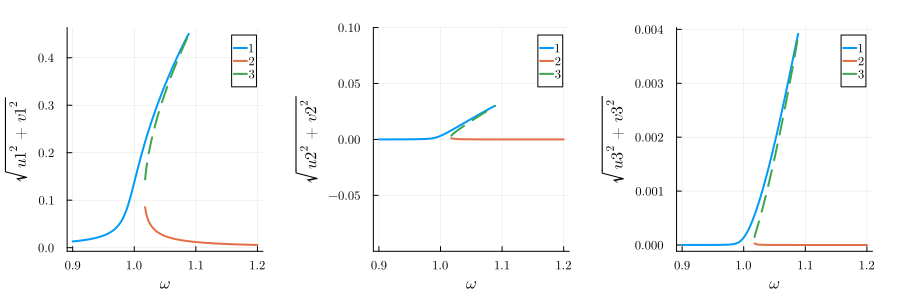

In [5]:
varied = (ω => range(0.9, 1.2, 200))
fixed = (α => 1.0, β => 1.0, ω0 => 1.0, γ => 0.005, F => 0.0025)
result = get_steady_states(harmonic_eq, varied, fixed; threading=true)

p1 = plot(result; y="√(u1^2+v1^2)", legend=:best)
p2 = plot(result; y="√(u2^2+v2^2)", legend=:best, ylims=(-0.1, 0.1))
p3 = plot(result; y="√(u3^2+v3^2)", legend=:best)
plot(p1, p2, p3; layout=(1, 3), size=(900, 300), margin=5mm)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*